In [2]:
#Import data


import pandas as pd
import hvplot.pandas
from MCForecastTools import MCSimulation
import matplotlib as plt
%matplotlib inline
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data
import pandas_datareader as pdr
import holoviews as hv
from datetime import timedelta
from pathlib import Path
import seaborn as sns

 

In [3]:
#Sheldon Whitehouse Republican Ticker Data

tickers = ['AAPL', 'FB', 'GILD', 'NSRGY', 'T', 'BIIB', 'MCHP', 'NFLX','IBM', 'V',]
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,7,26)
 
data = pdr.get_data_yahoo(tickers, start,end)
data = data['Adj Close']

In [4]:
# Sheldon DataFrame
sheldon_df = data.dropna()
sheldon_df

Symbols           AAPL          FB       GILD       NSRGY          T  \
Date                                                                   
2021-08-04  146.115219  358.920013  66.178726  122.628349  19.421373   
2021-08-05  146.224579  362.970001  66.236084  121.729546  19.484137   
2021-08-06  145.527512  363.510010  65.739075  120.606041  19.498081   
2021-08-09  145.477722  361.609985  65.433228  120.654892  19.421373   
2021-08-10  144.989792  361.130005  66.178726  120.752586  19.588737   
...                ...         ...        ...         ...        ...   
2022-07-20  153.039993  183.089996  61.549999  116.750000  20.480000   
2022-07-21  155.350006  183.169998  61.009998  119.129997  18.920000   
2022-07-22  154.089996  169.270004  60.799999  120.430000  18.400000   
2022-07-25  152.949997  166.649994  60.750000  121.269997  18.530001   
2022-07-26  151.600006  159.149994  60.619999  121.980003  18.299999   

Symbols           BIIB       MCHP        NFLX         IBM           V  
Date                                                                   
2021-08-04  338.100006  72.759216  517.349976  129.989990  235.100220  
2021-08-05  336.589996  73.878906  524.890015  129.999100  238.616745  
2021-08-06  340.000000  73.854240  520.549988  131.201019  239.798828  
2021-08-09  340.200012  73.740791  519.969971  130.095779  238.408127  
2021-08-10  337.220001  74.234039  515.840027  130.215515  236.490936  
...                ...        ...         ...         ...         ...  
2022-07-20  207.490005  65.550003  216.440002  129.179993  213.369995  
2022-07-21  214.059998  66.199997  223.880005  127.150002  216.190002  
2022-07-22  206.250000  64.720001  220.440002  128.250000  213.699997  
2022-07-25  207.570007  64.599998  218.509995  128.539993  214.270004  
2022-07-26  210.850006  63.490002  213.910004  128.080002  212.490005  

[246 rows x 10 columns]

In [5]:
# Sheldon Whitehouse Percent Change 
sheldon_returns = sheldon_df.pct_change().dropna()
sheldon_returns

Symbols         AAPL        FB      GILD     NSRGY         T      BIIB  \
Date                                                                     
2021-08-05  0.000748  0.011284  0.000867 -0.007329  0.003232 -0.004466   
2021-08-06 -0.004767  0.001488 -0.007504 -0.009230  0.000716  0.010131   
2021-08-09 -0.000342 -0.005227 -0.004652  0.000405 -0.003934  0.000588   
2021-08-10 -0.003354 -0.001327  0.011393  0.000810  0.008618 -0.008760   
2021-08-11  0.001786 -0.003240  0.008666 -0.001214  0.002492  0.005427   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  0.013510  0.041586 -0.009176 -0.018495 -0.015385 -0.057977   
2022-07-21  0.015094  0.000437 -0.008773  0.020385 -0.076172  0.031664   
2022-07-22 -0.008111 -0.075886 -0.003442  0.010912 -0.027484 -0.036485   
2022-07-25 -0.007398 -0.015478 -0.000822  0.006975  0.007065  0.006400   
2022-07-26 -0.008826 -0.045005 -0.002140  0.005855 -0.012412  0.015802   

Symbols         MCHP      NFLX       IBM         V  
Date                                                
2021-08-05  0.015389  0.014574  0.000070  0.014958  
2021-08-06 -0.000334 -0.008268  0.009246  0.004954  
2021-08-09 -0.001536 -0.001114 -0.008424 -0.005799  
2021-08-10  0.006689 -0.007943  0.000920 -0.008042  
2021-08-11 -0.000199 -0.006669  0.005305 -0.012643  
...              ...       ...       ...       ...  
2022-07-20  0.015964  0.073451 -0.012989 -0.001357  
2022-07-21  0.009916  0.034374 -0.015714  0.013217  
2022-07-22 -0.022356 -0.015365  0.008651 -0.011518  
2022-07-25 -0.001854 -0.008755  0.002261  0.002667  
2022-07-26 -0.017183 -0.021052 -0.003579 -0.008307  

[245 rows x 10 columns]

In [6]:
# Number of Trading Days 
trading_days = 252

In [7]:
# One Year Average Sheldon Whitehouse Returns
one_year_avg_sheldon_return = sheldon_df.mean() * trading_days
one_year_avg_sheldon_return.dropna()

Symbols
AAPL      39380.548207
FB        68109.843123
GILD      16174.775304
NSRGY     31305.508549
T          4705.242951
BIIB      60894.376014
MCHP      18480.137466
NFLX     109450.913977
IBM       32390.997639
V         54035.912641
dtype: float64

In [8]:
# Sheldon Whitehouse Cummulative Returns
sheldon_cummulative_returns = (1 + sheldon_returns).cumprod()
sheldon_cummulative_returns

Symbols         AAPL        FB      GILD     NSRGY         T      BIIB  \
Date                                                                     
2021-08-05  1.000748  1.011284  1.000867  0.992671  1.003232  0.995534   
2021-08-06  0.995978  1.012788  0.993357  0.983509  1.003950  1.005620   
2021-08-09  0.995637  1.007495  0.988735  0.983907  1.000000  1.006211   
2021-08-10  0.992298  1.006157  1.000000  0.984704  1.008618  0.997397   
2021-08-11  0.994070  1.002898  1.008666  0.983509  1.011131  1.002810   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  1.047393  0.510114  0.930057  0.952064  1.054508  0.613694   
2022-07-21  1.063202  0.510337  0.921897  0.971472  0.974184  0.633126   
2022-07-22  1.054579  0.471609  0.918724  0.982073  0.947410  0.610027   
2022-07-25  1.046777  0.464310  0.917969  0.988923  0.954104  0.613931   
2022-07-26  1.037537  0.443414  0.916004  0.994713  0.942261  0.623632   

Symbols         MCHP      NFLX       IBM         V  
Date                                                
2021-08-05  1.015389  1.014574  1.000070  1.014958  
2021-08-06  1.015050  1.006185  1.009316  1.019986  
2021-08-09  1.013491  1.005064  1.000814  1.014070  
2021-08-10  1.020270  0.997081  1.001735  1.005915  
2021-08-11  1.020066  0.990432  1.007049  0.993197  
...              ...       ...       ...       ...  
2022-07-20  0.900917  0.418363  0.993769  0.907570  
2022-07-21  0.909850  0.432744  0.978152  0.919565  
2022-07-22  0.889509  0.426095  0.986614  0.908974  
2022-07-25  0.887860  0.422364  0.988845  0.911399  
2022-07-26  0.872604  0.413473  0.985307  0.903827  

[245 rows x 10 columns]

In [9]:
# One Year Sheldon Whitehouse Standard Deviation
one_year_sheldon_std = sheldon_df.std() * np.sqrt(trading_days)
one_year_sheldon_std.sort_values()

Symbols
T          19.641749
GILD       61.831394
NSRGY      94.258145
IBM       112.077645
MCHP      122.876853
V         187.377802
AAPL      199.337040
BIIB      699.232576
FB       1196.909858
NFLX     2841.905818
dtype: float64

In [10]:
# One Year Sheldon Whitehouse Sharpe Ratio
one_year_sheldon_sharpe_ratio = one_year_avg_sheldon_return / one_year_sheldon_std
one_year_sheldon_sharpe_ratio.dropna()

Symbols
AAPL     197.557605
FB        56.904739
GILD     261.594868
NSRGY    332.125233
T        239.553156
BIIB      87.087441
MCHP     150.395595
NFLX      38.513209
IBM      289.004981
V        288.379477
dtype: float64

In [11]:
# plot Sheldon Whitehouse Sharpe Ratio
one_year_sheldon_sharpe_ratio.hvplot(title= "Sheldon's Sharpe Ratio")

:Curve   [Symbols]   (0)

In [12]:
# Trading Days 
days_in_trading = 252

In [12]:
# Sheldon Whitehouse Cumalative Returns
sheldon_cum_returns = (1 + sheldon_returns).cumprod()
sheldon_cum_returns

Symbols         AAPL        FB      GILD     NSRGY         T      BIIB  \
Date                                                                     
2021-08-03  1.012644  0.997983  1.021653  0.998735  1.002846  1.018993   
2021-08-04  1.009827  1.019804  1.013021  0.992488  0.990751  1.019295   
2021-08-05  1.010583  1.031311  1.013899  0.985214  0.993952  1.014742   
2021-08-06  1.005765  1.032846  1.006291  0.976121  0.994664  1.025023   
2021-08-09  1.005421  1.027447  1.001609  0.976516  0.990751  1.025626   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  1.057685  0.520216  0.942168  0.944912  1.044755  0.625535   
2022-07-21  1.073650  0.520443  0.933902  0.964174  0.965174  0.645342   
2022-07-22  1.064942  0.480949  0.930687  0.974696  0.938647  0.621797   
2022-07-25  1.057063  0.473505  0.929922  0.981494  0.945279  0.625776   
2022-07-26  1.047733  0.452195  0.927932  0.987241  0.933546  0.635665   

Symbols         MCHP      NFLX       IBM         V  
Date                                                
2021-08-03  1.012622  0.991595  1.018738  0.988781  
2021-08-04  1.017381  1.004271  1.009475  0.987030  
2021-08-05  1.033037  1.018907  1.009546  1.001793  
2021-08-06  1.032692  1.010482  1.018880  1.006756  
2021-08-09  1.031106  1.009356  1.010297  1.000917  
...              ...       ...       ...       ...  
2022-07-20  0.916575  0.420149  1.003185  0.895799  
2022-07-21  0.925664  0.434592  0.987421  0.907638  
2022-07-22  0.904969  0.427914  0.995963  0.897184  
2022-07-25  0.903291  0.424168  0.998215  0.899578  
2022-07-26  0.887770  0.415238  0.994643  0.892104  

[247 rows x 10 columns]

In [13]:
# One year Mean Sheldon Whitehouse Returns 
trading_days = 252 
one_year_average_sheldon_return = sheldon_df.mean() * trading_days
one_year_average_sheldon_return

Symbols
AAPL      39358.876409
FB        68275.101971
GILD      16178.534488
NSRGY     31303.984568
T          4707.191846
BIIB      61083.793962
MCHP      18477.360792
NFLX     109610.763251
IBM       32393.925337
V         54081.486650
dtype: float64

In [14]:
# Sort returns low to high 
one_year_average_sheldon_return.sort_values()

Symbols
T          4707.191846
GILD      16178.534488
MCHP      18477.360792
NSRGY     31303.984568
IBM       32393.925337
AAPL      39358.876409
V         54081.486650
BIIB      61083.793962
FB        68275.101971
NFLX     109610.763251
dtype: float64

In [13]:
# 
one_year_sheldon_std = sheldon_df.std() * np.sqrt(trading_days)
one_year_sheldon_std.sort_values()

Symbols
T          19.641749
GILD       61.831394
NSRGY      94.258145
IBM       112.077645
MCHP      122.876853
V         187.377802
AAPL      199.337040
BIIB      699.232576
FB       1196.909858
NFLX     2841.905818
dtype: float64

In [16]:
# Sheldon Whitehouse Variance 
sheldon_variance = sheldon_returns.var()
sheldon_variance

Symbols
AAPL     0.000360
FB       0.001118
GILD     0.000142
NSRGY    0.000149
T        0.000274
BIIB     0.000414
MCHP     0.000674
NFLX     0.001535
IBM      0.000217
V        0.000387
dtype: float64

In [17]:
# Sheldon Whitehouse Cumalative Returns
sheldon_cummulative_returns = (1 + sheldon_returns).cumprod()
sheldon_cummulative_returns

Symbols         AAPL        FB      GILD     NSRGY         T      BIIB  \
Date                                                                     
2021-08-03  1.012644  0.997983  1.021653  0.998735  1.002846  1.018993   
2021-08-04  1.009827  1.019804  1.013021  0.992488  0.990751  1.019295   
2021-08-05  1.010583  1.031311  1.013899  0.985214  0.993952  1.014742   
2021-08-06  1.005765  1.032846  1.006291  0.976121  0.994664  1.025023   
2021-08-09  1.005421  1.027447  1.001609  0.976516  0.990751  1.025626   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  1.057685  0.520216  0.942168  0.944912  1.044755  0.625535   
2022-07-21  1.073650  0.520443  0.933902  0.964174  0.965174  0.645342   
2022-07-22  1.064942  0.480949  0.930687  0.974696  0.938647  0.621797   
2022-07-25  1.057063  0.473505  0.929922  0.981494  0.945279  0.625776   
2022-07-26  1.047733  0.452195  0.927932  0.987241  0.933546  0.635665   

Symbols         MCHP      NFLX       IBM         V  
Date                                                
2021-08-03  1.012622  0.991595  1.018738  0.988781  
2021-08-04  1.017381  1.004271  1.009475  0.987030  
2021-08-05  1.033037  1.018907  1.009546  1.001793  
2021-08-06  1.032692  1.010482  1.018880  1.006756  
2021-08-09  1.031106  1.009356  1.010297  1.000917  
...              ...       ...       ...       ...  
2022-07-20  0.916575  0.420149  1.003185  0.895799  
2022-07-21  0.925664  0.434592  0.987421  0.907638  
2022-07-22  0.904969  0.427914  0.995963  0.897184  
2022-07-25  0.903291  0.424168  0.998215  0.899578  
2022-07-26  0.887770  0.415238  0.994643  0.892104  

[247 rows x 10 columns]

In [18]:
# S&P 500 benchmark ticker data 
tickers = ['SPY']
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,7,26)
 
data = pdr.get_data_yahoo(tickers, start,end)
data = data['Adj Close']

In [19]:
# S&P 500 dropna 
spy_df = data.dropna()
spy_df

Symbols            SPY
Date                  
2021-01-04  361.251160
2021-01-05  363.739197
2021-01-06  365.913849
2021-01-07  371.350372
2021-01-08  373.466248
...                ...
2022-07-20  394.769989
2022-07-21  398.790009
2022-07-22  395.089996
2022-07-25  395.570007
2022-07-26  390.890015

[393 rows x 1 columns]

In [20]:
#Nancy Pelosi Democrat
#Import Data

tickers = ['AAPL', 'MSFT', 'NVDA', 'FB', 'AMZN', 'V', 'DIS', 'CRM','GOOG', 'TSLA',]
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2022,7,26)
 
data = pdr.get_data_yahoo(tickers, start,end)
data = data['Adj Close']

In [21]:
#Display Data table 
data.dropna()

Symbols           AAPL        MSFT        NVDA          FB        AMZN  \
Date                                                                     
2021-08-02  144.693329  282.513123  197.365631  351.950012  166.574005   
2021-08-03  146.522873  284.794525  198.015198  351.239990  168.311996   
2021-08-04  146.115204  284.189453  202.602081  358.920013  167.735992   
2021-08-05  146.224594  287.175049  206.229599  362.970001  168.799500   
2021-08-06  145.527527  287.115540  203.521454  363.510010  167.246994   
...                ...         ...         ...         ...         ...   
2022-07-20  153.039993  262.269989  178.070007  183.089996  122.769997   
2022-07-21  155.350006  264.839996  180.500000  183.169998  124.629997   
2022-07-22  154.089996  260.359985  173.190002  169.270004  122.419998   
2022-07-25  152.949997  258.829987  170.240005  166.649994  121.139999   
2022-07-26  151.600006  251.899994  165.330002  159.149994  114.809998   

Symbols              V         DIS         CRM        GOOG        TSLA  
Date                                                                    
2021-08-02  238.189590  175.550003  240.860001  135.989502  709.669983  
2021-08-03  235.517426  172.990005  241.130005  136.279999  709.739990  
2021-08-04  235.100220  172.580002  244.169998  136.028503  710.919983  
2021-08-05  238.616760  176.710007  250.559998  136.940002  714.630005  
2021-08-06  239.798843  177.130005  250.589996  137.035995  699.099976  
...                ...         ...         ...         ...         ...  
2022-07-20  213.369995  103.349998  182.449997  114.699997  742.500000  
2022-07-21  216.190002  104.180000  185.350006  115.040001  815.119995  
2022-07-22  213.699997  102.720001  182.470001  108.360001  816.729980  
2022-07-25  214.270004  102.690002  177.289993  108.209999  805.299988  
2022-07-26  212.490005   99.779999  170.460007  105.440002  776.580017  

[248 rows x 10 columns]

In [22]:
# Nancy Pelosi s
pelosi_df = data.dropna()
pelosi_df

Symbols           AAPL        MSFT        NVDA          FB        AMZN  \
Date                                                                     
2021-08-02  144.693329  282.513123  197.365631  351.950012  166.574005   
2021-08-03  146.522873  284.794525  198.015198  351.239990  168.311996   
2021-08-04  146.115204  284.189453  202.602081  358.920013  167.735992   
2021-08-05  146.224594  287.175049  206.229599  362.970001  168.799500   
2021-08-06  145.527527  287.115540  203.521454  363.510010  167.246994   
...                ...         ...         ...         ...         ...   
2022-07-20  153.039993  262.269989  178.070007  183.089996  122.769997   
2022-07-21  155.350006  264.839996  180.500000  183.169998  124.629997   
2022-07-22  154.089996  260.359985  173.190002  169.270004  122.419998   
2022-07-25  152.949997  258.829987  170.240005  166.649994  121.139999   
2022-07-26  151.600006  251.899994  165.330002  159.149994  114.809998   

Symbols              V         DIS         CRM        GOOG        TSLA  
Date                                                                    
2021-08-02  238.189590  175.550003  240.860001  135.989502  709.669983  
2021-08-03  235.517426  172.990005  241.130005  136.279999  709.739990  
2021-08-04  235.100220  172.580002  244.169998  136.028503  710.919983  
2021-08-05  238.616760  176.710007  250.559998  136.940002  714.630005  
2021-08-06  239.798843  177.130005  250.589996  137.035995  699.099976  
...                ...         ...         ...         ...         ...  
2022-07-20  213.369995  103.349998  182.449997  114.699997  742.500000  
2022-07-21  216.190002  104.180000  185.350006  115.040001  815.119995  
2022-07-22  213.699997  102.720001  182.470001  108.360001  816.729980  
2022-07-25  214.270004  102.690002  177.289993  108.209999  805.299988  
2022-07-26  212.490005   99.779999  170.460007  105.440002  776.580017  

[248 rows x 10 columns]

In [23]:
# Nancy Pelosi Percent Change 
pelosi_returns = pelosi_df.pct_change()
pelosi_returns.dropna()

Symbols         AAPL      MSFT      NVDA        FB      AMZN         V  \
Date                                                                     
2021-08-03  0.012644  0.008075  0.003291 -0.002017  0.010434 -0.011219   
2021-08-04 -0.002782 -0.002125  0.023164  0.021865 -0.003422 -0.001771   
2021-08-05  0.000749  0.010506  0.017905  0.011284  0.006340  0.014958   
2021-08-06 -0.004767 -0.000207 -0.013132  0.001488 -0.009197  0.004954   
2021-08-09 -0.000342 -0.003904 -0.003486 -0.005227 -0.000918 -0.005799   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  0.013510  0.010558  0.047964  0.041586  0.038575 -0.001357   
2022-07-21  0.015094  0.009799  0.013646  0.000437  0.015150  0.013217   
2022-07-22 -0.008111 -0.016916 -0.040499 -0.075886 -0.017732 -0.011518   
2022-07-25 -0.007398 -0.005876 -0.017033 -0.015478 -0.010456  0.002667   
2022-07-26 -0.008826 -0.026774 -0.028842 -0.045005 -0.052254 -0.008307   

Symbols          DIS       CRM      GOOG      TSLA  
Date                                                
2021-08-03 -0.014583  0.001121  0.002136  0.000099  
2021-08-04 -0.002370  0.012607 -0.001845  0.001663  
2021-08-05  0.023931  0.026170  0.006701  0.005219  
2021-08-06  0.002377  0.000120  0.000701 -0.021732  
2021-08-09 -0.002315 -0.005068  0.007049  0.020970  
...              ...       ...       ...       ...  
2022-07-20  0.037546  0.049709  0.000698  0.008023  
2022-07-21  0.008031  0.015895  0.002964  0.097805  
2022-07-22 -0.014014 -0.015538 -0.058067  0.001975  
2022-07-25 -0.000292 -0.028388 -0.001384 -0.013995  
2022-07-26 -0.028338 -0.038524 -0.025598 -0.035664  

[247 rows x 10 columns]

In [24]:
#Days in trading
days_in_trading = 252

In [25]:
# Nancy Pelosi cummulative Returns of Dataframe
pelosi_cum_returns = (1 + pelosi_returns).cumprod()
pelosi_cum_returns

Symbols         AAPL      MSFT      NVDA        FB      AMZN         V  \
Date                                                                     
2021-08-02       NaN       NaN       NaN       NaN       NaN       NaN   
2021-08-03  1.012644  1.008075  1.003291  0.997983  1.010434  0.988781   
2021-08-04  1.009827  1.005934  1.026532  1.019804  1.006976  0.987030   
2021-08-05  1.010583  1.016502  1.044911  1.031311  1.013360  1.001793   
2021-08-06  1.005765  1.016291  1.031190  1.032846  1.004040  1.006756   
...              ...       ...       ...       ...       ...       ...   
2022-07-20  1.057685  0.928346  0.902234  0.520216  0.737030  0.895799   
2022-07-21  1.073650  0.937443  0.914546  0.520443  0.748196  0.907638   
2022-07-22  1.064942  0.921585  0.877508  0.480949  0.734929  0.897184   
2022-07-25  1.057063  0.916170  0.862562  0.473505  0.727244  0.899578   
2022-07-26  1.047733  0.891640  0.837684  0.452195  0.689243  0.892104   

Symbols          DIS       CRM      GOOG      TSLA  
Date                                                
2021-08-02       NaN       NaN       NaN       NaN  
2021-08-03  0.985417  1.001121  1.002136  1.000099  
2021-08-04  0.983082  1.013742  1.000287  1.001761  
2021-08-05  1.006608  1.040272  1.006990  1.006989  
2021-08-06  1.009000  1.040397  1.007695  0.985106  
...              ...       ...       ...       ...  
2022-07-20  0.588721  0.757494  0.843447  1.046261  
2022-07-21  0.593449  0.769534  0.845948  1.148590  
2022-07-22  0.585132  0.757577  0.796826  1.150859  
2022-07-25  0.584962  0.736071  0.795723  1.134753  
2022-07-26  0.568385  0.707714  0.775354  1.094283  

[248 rows x 10 columns]

In [26]:
# Nancy Pelosi One Year Average return 
trading_days = 252
one_year_average_pelosi_return = pelosi_df.mean() * trading_days
one_year_average_pelosi_return

Symbols
AAPL     39358.876332
MSFT     74256.600158
NVDA     57645.171298
FB       68275.101971
AMZN     38101.674036
V        54081.486774
DIS      36083.778368
CRM      57255.507521
GOOG     33502.569827
TSLA    220471.141228
dtype: float64

In [27]:
# Nancy Pelosi sort one year average return low to high 
one_year_average_pelosi_return.sort_values()

Symbols
GOOG     33502.569827
DIS      36083.778368
AMZN     38101.674036
AAPL     39358.876332
V        54081.486774
CRM      57255.507521
NVDA     57645.171298
FB       68275.101971
MSFT     74256.600158
TSLA    220471.141228
dtype: float64

In [28]:
one_year_pelosi_std = pelosi_df.std() * np.sqrt(trading_days)
one_year_pelosi_std.sort_values()

Symbols
V        189.334794
AAPL     199.111505
GOOG     203.425376
AMZN     371.361766
MSFT     393.060061
DIS      449.041665
CRM      714.136778
NVDA     749.246098
FB      1197.655045
TSLA    2428.799455
dtype: float64

In [29]:
# Nancy Pelosi Sharpe Ratio
one_year_pelosi_sharpe_ratio = one_year_average_pelosi_return / one_year_pelosi_std
one_year_pelosi_sharpe_ratio

Symbols
AAPL    197.672537
MSFT    188.919220
NVDA     76.937566
FB       57.007318
AMZN    102.599884
V       285.639452
DIS      80.357306
CRM      80.174428
GOOG    164.692185
TSLA     90.773712
dtype: float64

In [30]:
# Sort Nancy Pelosi One Year Sharpe Ratio low to high 
one_year_pelosi_sharpe_ratio.sort_values()

Symbols
FB       57.007318
NVDA     76.937566
CRM      80.174428
DIS      80.357306
TSLA     90.773712
AMZN    102.599884
GOOG    164.692185
MSFT    188.919220
AAPL    197.672537
V       285.639452
dtype: float64

In [31]:
# Beta, covariance and Variance 
pelosi_variance = pelosi_returns.var()
pelosi_variance

Symbols
AAPL    0.000360
MSFT    0.000342
NVDA    0.001392
FB      0.001118
AMZN    0.000700
V       0.000387
DIS     0.000351
CRM     0.000734
GOOG    0.000410
TSLA    0.001573
dtype: float64

In [32]:
# S&P 500 Percent Change 
spy_returns = spy_df.pct_change().dropna()
spy_returns

Symbols          SPY
Date                
2021-01-05  0.006887
2021-01-06  0.005979
2021-01-07  0.014857
2021-01-08  0.005698
2021-01-11 -0.006741
...              ...
2022-07-20  0.006373
2022-07-21  0.010183
2022-07-22 -0.009278
2022-07-25  0.001215
2022-07-26 -0.011831

[392 rows x 1 columns]

In [33]:
# S&P 500 Cummalative Returns
spy_cum_returns = (1 + spy_returns).cumprod()
spy_cum_returns

Symbols          SPY
Date                
2021-01-05  1.006887
2021-01-06  1.012907
2021-01-07  1.027956
2021-01-08  1.033813
2021-01-11  1.026845
...              ...
2022-07-20  1.092785
2022-07-21  1.103913
2022-07-22  1.093671
2022-07-25  1.095000
2022-07-26  1.082045

[392 rows x 1 columns]

In [34]:
# S&P 500 variance 
spy_variance = spy_cum_returns.var()
spy_variance

Symbols
SPY    0.006402
dtype: float64

In [35]:
# S&P 500 one year average return 
trading_days = 252
one_year_average_spy_return = spy_df.mean() * trading_days
one_year_average_spy_return


Symbols
SPY    105888.200424
dtype: float64

In [36]:
# S&P 500 Standard Deviation
one_year_spy_std = spy_df.std() * np.sqrt(trading_days)
one_year_spy_std.sort_values()

Symbols
SPY    460.690883
dtype: float64

In [37]:
one_year_spy_std = spy_df.std() * np.sqrt(trading_days)
one_year_spy_std.sort_values()

Symbols
SPY    460.690883
dtype: float64

In [38]:
# S&P 500 Sharpe Ratio 
spy_sharp_ratio = one_year_average_spy_return / one_year_spy_std
spy_sharp_ratio

Symbols
SPY    229.846529
dtype: float64

<AxesSubplot:xlabel='Symbols'>

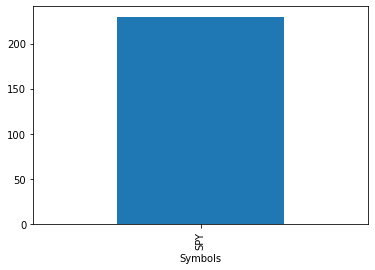

In [39]:
# Plot S&P 500 Sharpe Ratio
spy_sharp_ratio.plot.bar()

In [40]:
# Concatenate Nancy Pelosi and S&P 500 dataframe 
pelosi_spy_df = pd.concat([pelosi_df, spy_df], join="inner", axis=1 )
pelosi_spy_df.head()

Symbols           AAPL        MSFT        NVDA          FB        AMZN  \
Date                                                                     
2021-08-02  144.693329  282.513123  197.365631  351.950012  166.574005   
2021-08-03  146.522873  284.794525  198.015198  351.239990  168.311996   
2021-08-04  146.115204  284.189453  202.602081  358.920013  167.735992   
2021-08-05  146.224594  287.175049  206.229599  362.970001  168.799500   
2021-08-06  145.527527  287.115540  203.521454  363.510010  167.246994   

Symbols              V         DIS         CRM        GOOG        TSLA  \
Date                                                                     
2021-08-02  238.189590  175.550003  240.860001  135.989502  709.669983   
2021-08-03  235.517426  172.990005  241.130005  136.279999  709.739990   
2021-08-04  235.100220  172.580002  244.169998  136.028503  710.919983   
2021-08-05  238.616760  176.710007  250.559998  136.940002  714.630005   
2021-08-06  239.798843  177.130005  250.589996  137.035995  699.099976   

Symbols            SPY  
Date                    
2021-08-02  431.455566  
2021-08-03  434.965668  
2021-08-04  432.826111  
2021-08-05  435.567139  
2021-08-06  436.286865

In [60]:
# Read in Sheldon Whitehouse Returns CSV
whitehouse_stocks = pd.read_csv(Path("./Whitehouse_returns.csv"), parse_dates = True, infer_datetime_format = True,)

In [61]:
whitehouse_stocks.head()

Whitehouse Top 10  1 Year Return  1 Year Risk       Sharp
0              NFLX   109610.76330  2832.589674   38.696308
1                FB    68275.10197  1197.655045   57.007318
2              BIIB    61083.79396   708.922332   86.164296
3                 V    54081.48665   189.334786  285.639464
4              APPL    39358.87640   199.111502  197.672540

<AxesSubplot:title={'center':'Whitehouse Sharp Ratio Return'}>

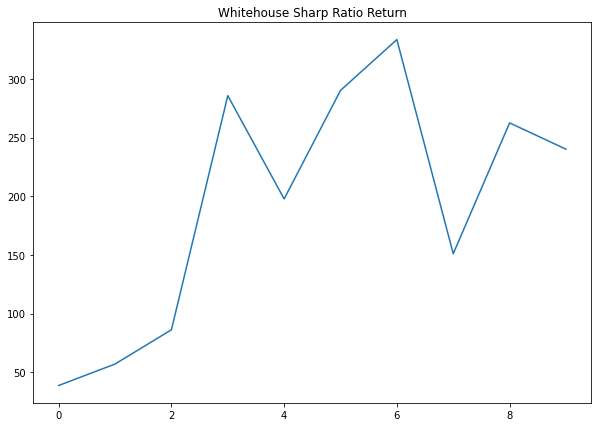

In [62]:
# Plot Sheldon Whitehouse Sharpe Ratio Returns
whitehouse_stocks['Sharp'].plot(figsize=(10,7), title = "Whitehouse Sharp Ratio Return")

<AxesSubplot:title={'center':'Whitehouse 1 Year Returns'}>

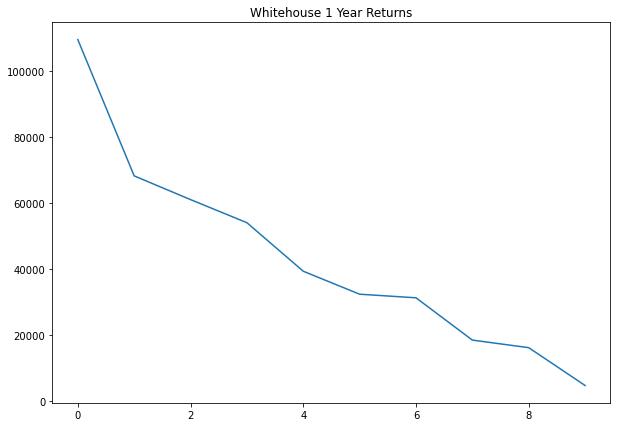

In [65]:
# Plot Sheldon White House 1 Year Return 
whitehouse_stocks['1 Year Return'].plot(figsize=(10,7), title = "Whitehouse 1 Year Returns")

<AxesSubplot:title={'center':'Whitehosue 1 year Risk'}>

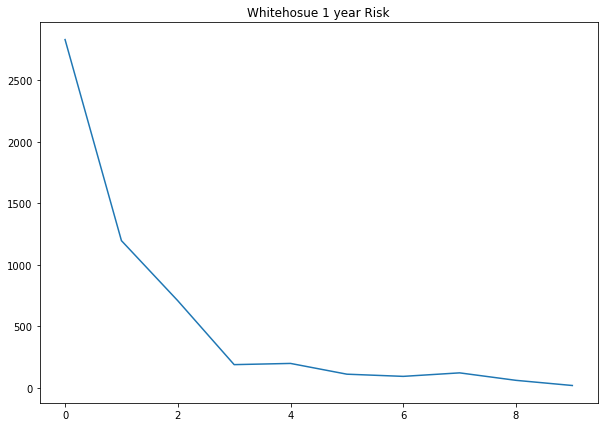

In [67]:
# PLot Sheldon Whitehouse 1 year Risk analysis
whitehouse_stocks['1 Year Risk'].plot(figsize=(10,7), title = "Whitehosue 1 year Risk")

<AxesSubplot:title={'center':'Whitehouse Fund returns'}, xlabel='Date'>

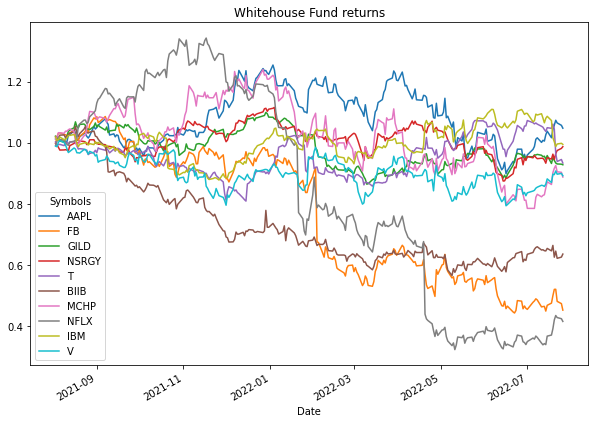

In [69]:
# Plot Sheldon Whitehouse Fund Returns plot 
sheldon_cummulative_returns.plot(figsize=(10,7), title = "Whitehouse Fund returns")

In [41]:
# Read in Nancy Pelosi Returns CSV
pelosi_stocks= pd.read_csv(Path("./Pelosi_returns.csv"), parse_dates = True, infer_datetime_format = True,)

<AxesSubplot:title={'center':'Spy Return'}, xlabel='Date'>

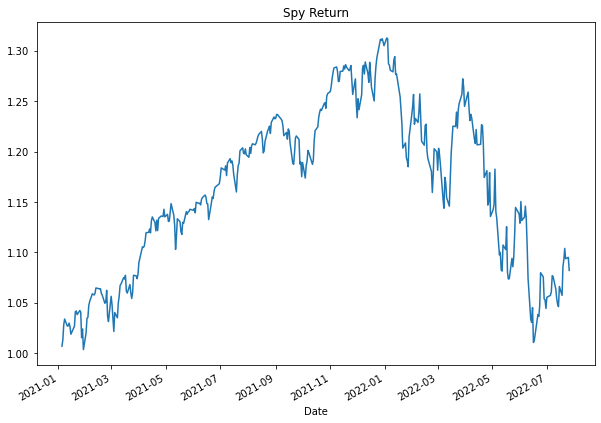

In [42]:
#S&P 500 Returns plot 
spy_cum_returns['SPY'].plot(figsize=(10,7), title = "Spy Return")

In [43]:
# Nancy Pelosi CSV data 
pelosi_funds = pelosi_stocks.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'])
pelosi_funds

Pelosi Top 10 Holdings  1 year returns  1 year risk       Sharp
0                    APPL        197000.0   442.071723  442.071723
1                    MSFT        371000.0   877.555120  423.018376
2                    NVDA        342000.0  1673.721458  172.104114
3                      FB        342000.0  2679.523428  127.562791
4                    AMZN        191000.0   829.417736  229.781916
5                       V        271000.0   427.918729  632.269554
6                     DIS        181000.0  1004.779032  179.726105
7                     CRM        286000.0  1593.979888  179.645963
8                    GOOG        168000.0   453.983789  369.009559
9                    TSLA       1100000.0  5436.419077  202.597695
10                    NaN             NaN          NaN         NaN

<AxesSubplot:title={'center':'Pelosi Sharp Ratio Return'}>

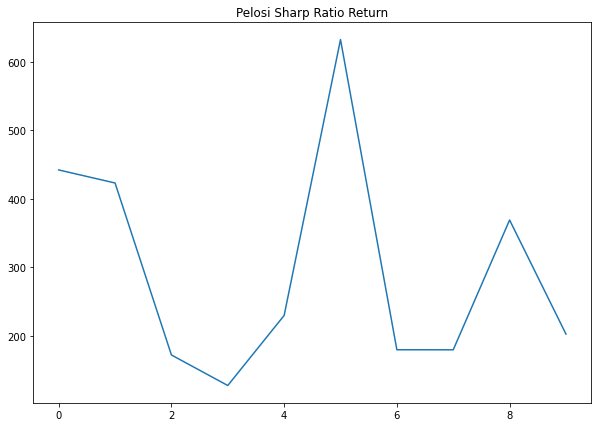

In [44]:
# Nancy Pelosi Sharpe Ratio Returns
pelosi_funds['Sharp'].plot(figsize=(10,7), title = "Pelosi Sharp Ratio Return")

<AxesSubplot:title={'center':'Pelosi 1 Year Returns'}>

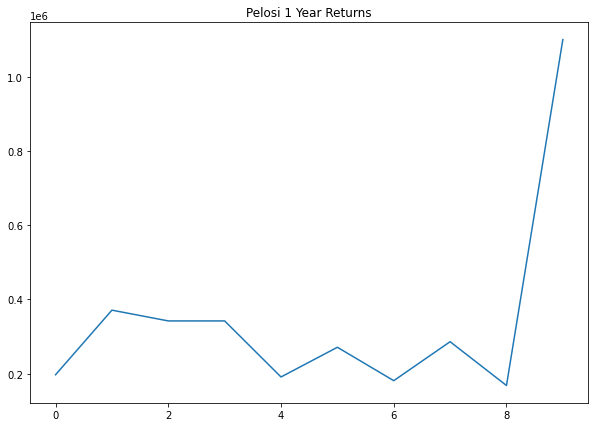

In [45]:
# Nancy Pelosi 1 Year Returns plot
pelosi_funds['1 year returns'].plot(figsize=(10,7), title = "Pelosi 1 Year Returns")

<AxesSubplot:title={'center':'Pelosi 1 year Risk'}>

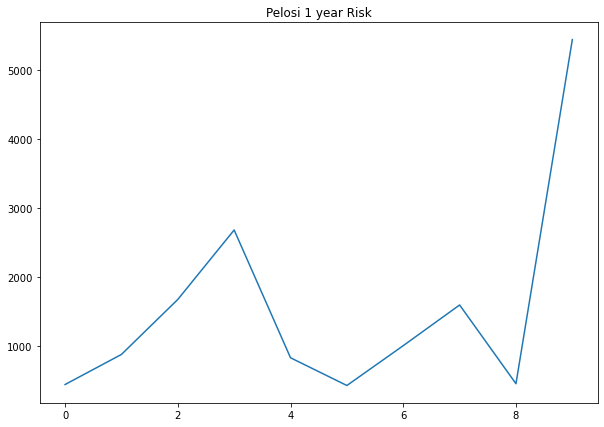

In [46]:
# Nancy Pelosi 1 Year Risk analysis plot
pelosi_funds['1 year risk'].plot(figsize=(10,7), title = "Pelosi 1 year Risk")

<AxesSubplot:title={'center':'Pelosi Fund returns'}, xlabel='Date'>

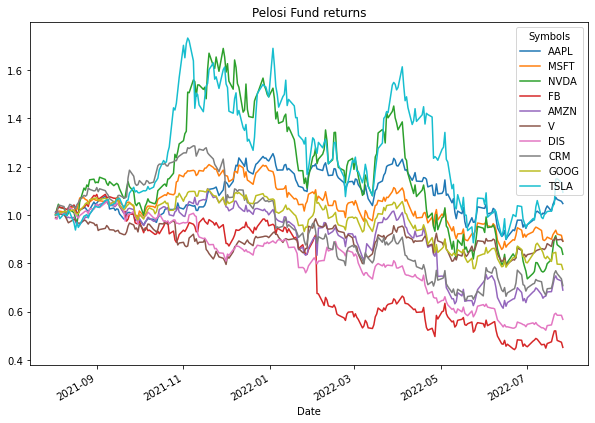

In [47]:
# Nancy Pelosi Fund Returns plot 
pelosi_cum_returns.plot(figsize=(10,7), title = "Pelosi Fund returns")

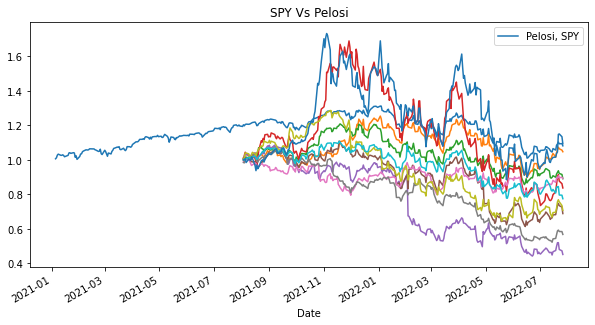

In [48]:
# Nancy Pelosi vs S&P 500 Cummalative Reurns
ax = spy_cum_returns.plot(
    legend="True",
    figsize=(10,5),
    title="SPY Vs Pelosi")
pelosi_cum_returns.plot(ax=ax)
ax.legend(["Pelosi, SPY"])

<AxesSubplot:>

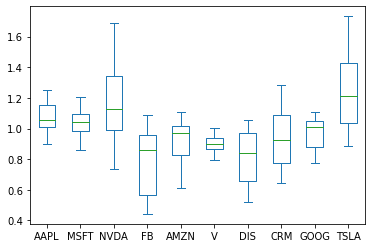

In [49]:
# Nancy Pelosi Box Plot Cummalative returns 
pelosi_cum_returns.plot(kind='box')

<AxesSubplot:>

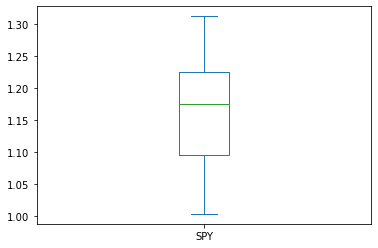

In [50]:
# S&P 500 BoPlot Cummalative returns
spy_cum_returns.plot(kind='box')

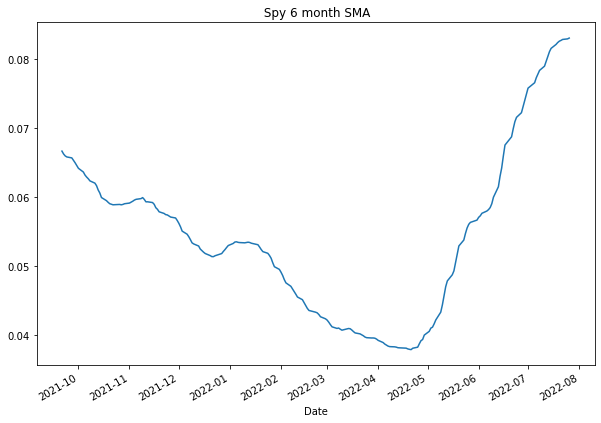

In [51]:
# S&P 500 6 month Simple Moving Average 
spy_std_180_day_rolling = spy_cum_returns["SPY"].rolling(window=180).std().plot( figsize=(10,7), title = " Spy 6 month SMA")

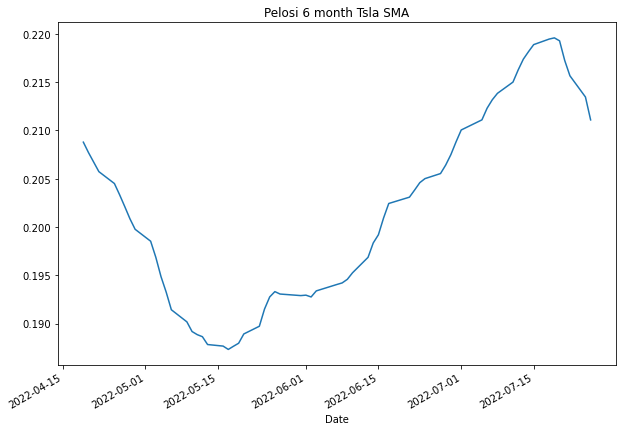

In [52]:
# Nancy Pelosi Tesla 6 month moving average
spy_std_365_day_rolling = pelosi_cum_returns["TSLA"].rolling(window=180).std().plot( figsize=(10,7), title = "Pelosi 6 month Tsla SMA")

<AxesSubplot:title={'center':'Pelosi Sharp Ratio'}, xlabel='Symbols'>

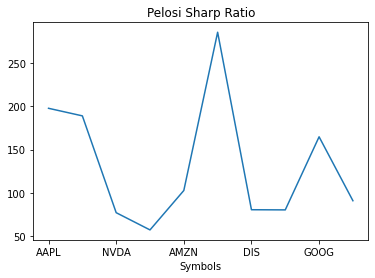

In [50]:
# Plot Pelosi Sharpe Ratio
one_year_pelosi_sharp_ratio = one_year_average_pelosi_return / one_year_pelosi_std
one_year_pelosi_sharp_ratio.plot( title = "Pelosi Sharp Ratio")

TypeError: unsupported operand type(s) for +: 'AxesSubplot' and 'AxesSubplot'

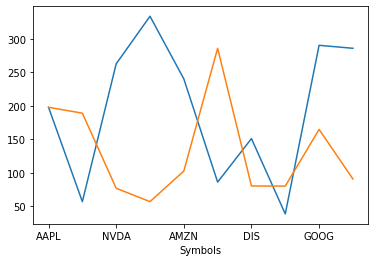

In [54]:
# plot One Year Sheldon Whitehouse Sharpe Ratio vs Nancy Pelosi Sharpe Ratio
one_year_sheldon_sharpe_ratio.plot() + one_year_pelosi_sharpe_ratio.plot()

<AxesSubplot:title={'center':' Pelosi Covariance for APPLE'}, xlabel='Date'>

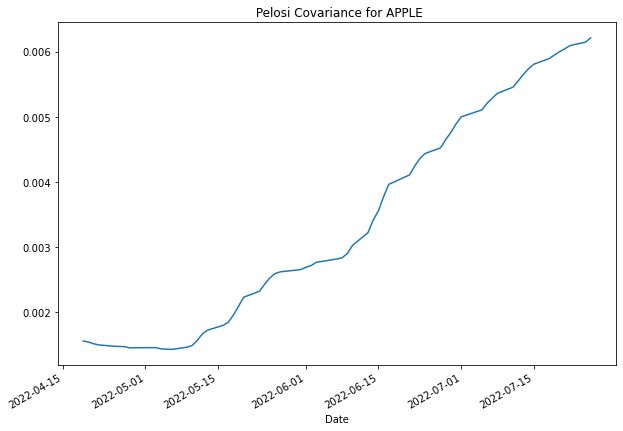

In [70]:
# Nancy Pelosi Covariance for Apple 
pelosi_rolling_180_covariance = pelosi_cum_returns['AAPL'].rolling(window=180).cov(spy_cum_returns['SPY'])
pelosi_rolling_180_covariance.plot(figsize=(10,7), title= " Pelosi Covariance for APPLE")

<AxesSubplot:title={'center':' Pelosi Covariance for TSLA'}, xlabel='Date'>

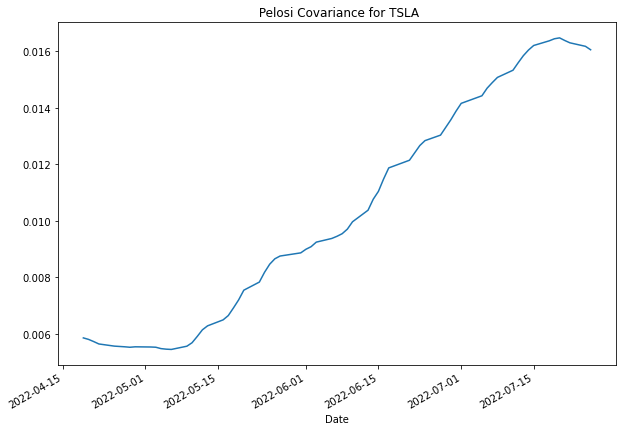

In [71]:
# Nancy Pelosi Covariance for Tesla 
pelosi_rolling_180_covariance = pelosi_cum_returns['TSLA'].rolling(window=180).cov(spy_cum_returns['SPY'])
pelosi_rolling_180_covariance.plot(figsize=(10,7), title= " Pelosi Covariance for TSLA")

<AxesSubplot:title={'center':' Whitehouse Covariance for APPLE'}, xlabel='Date'>

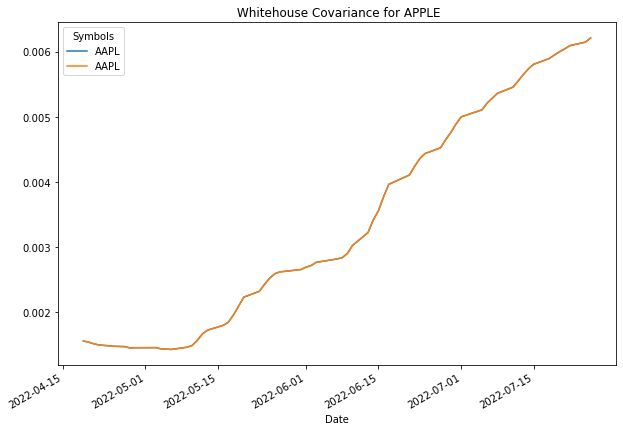

In [87]:
# Sheldon Whitehouse Covariance for Apple 
sheldon_rolling_180_covariance = sheldon_cummulative_returns['AAPL'].rolling(window=180).cov(spy_cum_returns['SPY'])
sheldon_rolling_180_covariance.plot(figsize=(10,7), title= " Whitehouse Covariance for APPLE")

<AxesSubplot:title={'center':' Whitehosue Covariance for TSLA'}, xlabel='Date'>

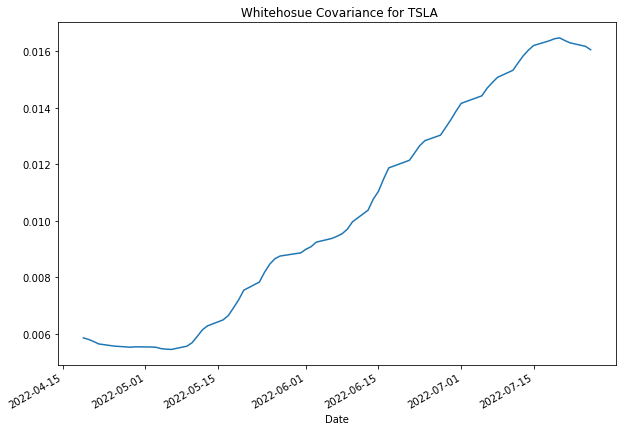

In [88]:
# Sheldon Whitehouse Covariance for Tesla 
sheldon_rolling_180_covariance = sheldon_cummulative_returns['TSLA'].rolling(window=180).cov(spy_cum_returns['SPY'])
sheldon_rolling_180_covariance.plot(figsize=(10,7), title= " Whitehosue Covariance for TSLA")

In [46]:
# Nancy Pelosi Apple Beta 
pelosi_aapl_beta = pelosi_cum_returns['AAPL'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_aapl_beta


0.6456641553944888

In [73]:
# Nancy Pelosi Google Beta 
pelosi_goog_beta = pelosi_cum_returns['GOOG'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_goog_beta


0.9981915897984621

In [74]:
# Nancy Pelosi Visa Beta 
pelosi_v_beta = pelosi_cum_returns['V'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_v_beta


0.2582864813833505

In [75]:
# Nancy Pelosi Microsoft Beta
pelosi_msft_beta = pelosi_cum_returns['MSFT'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_msft_beta

0.9406038685074142

In [76]:
# Nancy Pelosi Tesla Beta 
pelosi_tsla_beta = pelosi_cum_returns['TSLA'].cov(spy_cum_returns['SPY']) / spy_cum_returns['SPY'].var()
pelosi_tsla_beta


1.8321922658784762

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

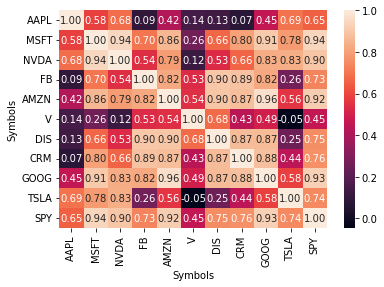

In [78]:
# Heat map for Nancy Pelosi Cumulative Returns 
pelosi_spy_cumulative_returns = pd.concat([pelosi_cum_returns, spy_cum_returns], axis=1)

sns.heatmap(pelosi_spy_cumulative_returns.corr(), annot=True, fmt='.2f')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

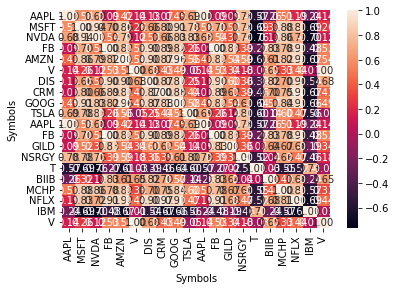

In [79]:
# Heat map for Sheldon Whitehouse Cumulative Returns 
sheldon_cummulative_returns = pd.concat([pelosi_cum_returns, sheldon_cummulative_returns], axis=1)

sns.heatmap(sheldon_cummulative_returns.corr(), annot=True, fmt='.2f')

<AxesSubplot:title={'center':'SPY Probability Distribution'}, ylabel='Density'>

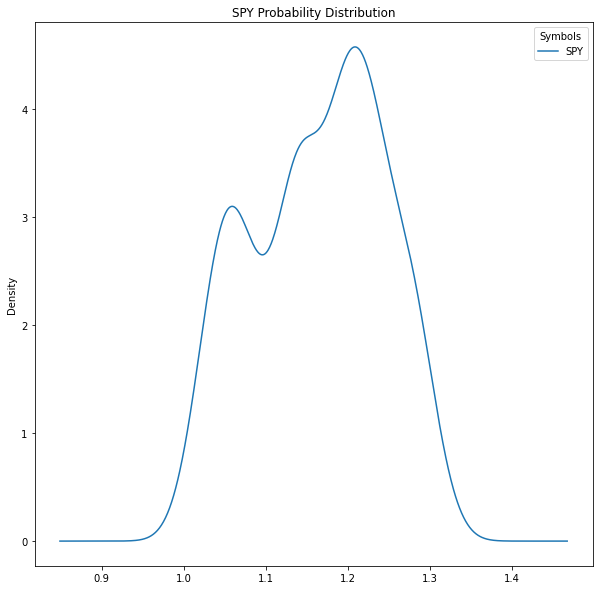

In [80]:
# Plot S&P 500 Probability Distribution 
spy_cum_returns.plot.density(figsize=(10,10), title = "SPY Probability Distribution")

<AxesSubplot:title={'center':'Whitehouse Probability Distribution'}, ylabel='Density'>

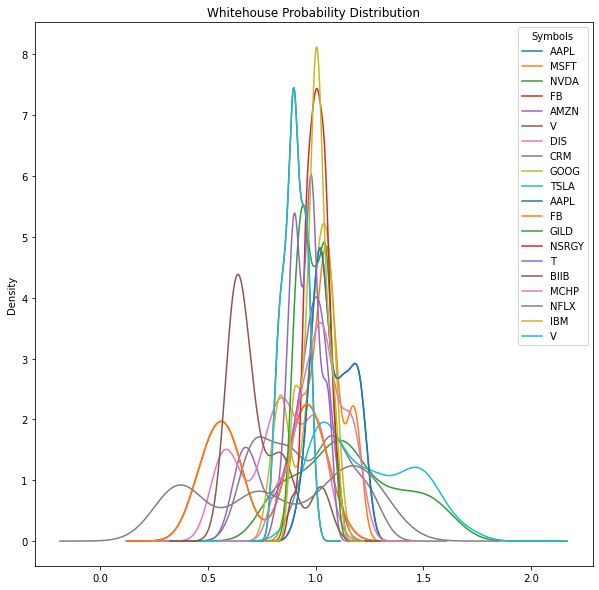

In [83]:
# Sheldon Whitehouse Probability distribution
sheldon_cummulative_returns.plot.density(figsize=(10,10), title = "Whitehouse Probability Distribution")

<AxesSubplot:title={'center':'Pelosi Probability Distribution'}, ylabel='Density'>

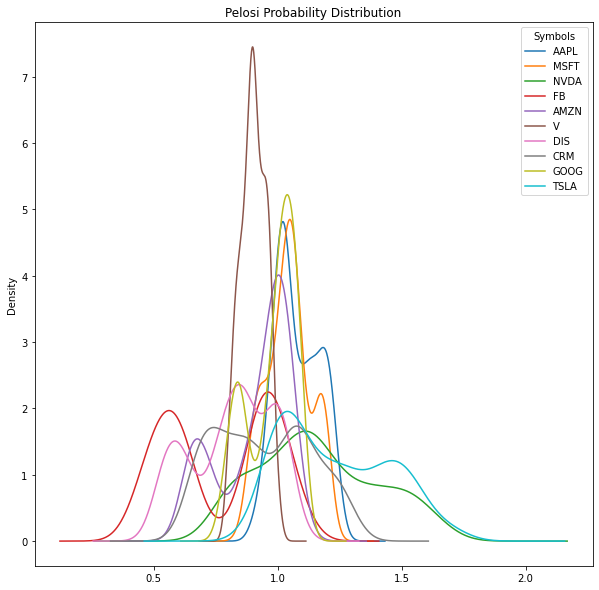

In [81]:
# Nancy Pelosi Probability Distribution
pelosi_cum_returns.plot.density(figsize=(10,10), title = "Pelosi Probability Distribution")

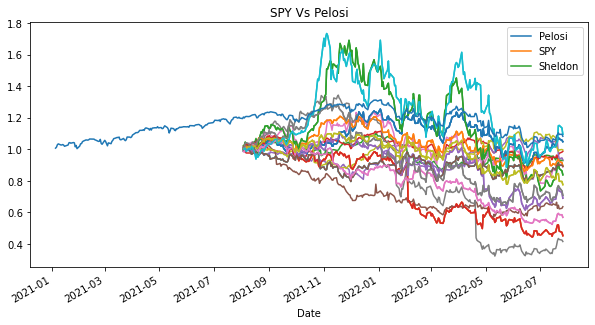

In [82]:
# PLot Cumulative Returns for Nancy Pelosi S&P 500 and Sheldon Whitehouse
ax = sheldon_cummulative_returns.plot(
    legend="True",
    figsize=(10,5),
    title="SPY Vs Pelosi")
pelosi_cum_returns.plot(ax=ax)
spy_cum_returns.plot(ax=ax)

ax.legend(["Pelosi","SPY", "Sheldon"])

In [54]:
# IF ELSE statements for Risk/Returns
if one_year_pelosi_sharpe_ratio.sum() > spy_sharp_ratio.sum():
    print("Pelosi's portfolio has a better Risk/Return ratio than the SPY"),
else:
    print("SPY has a better Risk/Return ratio than Pelosi's portfolio")
if one_year_pelosi_std.sum() > one_year_spy_std.sum():
    print("Pelosi's stock portfolio is more volatile than the SPY")
else:
    print("SPY is more volatile than Pelosi's stock portfolio")   


Pelosi's portfolio has a better Risk/Return ratio than the SPY
Pelosi's stock portfolio is more volatile than the SPY


In [56]:
# Plot side by side and overlay charts to show comparisions. 

In [ ]:
pelosi_monte = pelosi_funds